## CE888 Lab8 Convolutional Neural Network with Dogs vs. Cats Dataset
**Date**: 4 March 2019, Monday

##### The Dogs vs. Cats dataset that you’ll use isn’t packaged with Keras. It was made available by Kaggle as part of a computer-vision competition in late 2013, back when convnets weren’t mainstream. You can download the original dataset from www.kaggle.com/c/dogs-vs-cats/data (you’ll need to create a Kaggle account if you don’t already have one—don’t worry, the process is painless).

Unsurprisingly, the dogs-versus-cats Kaggle competition in 2013 was won by entrants who used convnets. The best entries achieved up to 95% accuracy. In this example, you’ll get fairly close to this accuracy (in the next section), even though you’ll train
your models on less than 10% of the data that was available to the competitors. This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). After downloading and uncompressing it, you’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

In [ ]:
!ls ../../../"Lab script and codes"

In [ ]:
import os, shutil
#original_dataset_dir = 'G:\Data\Kaggle\DogCatData'
original_dataset_dir = '../../../Lab script and codes/Lab8_data_source/train'

In [ ]:
#base_dir = 'G:\Data\cats_and_dogs_small'
base_dir = '../../../Lab script and codes/Lab8_data'
#os.mkdir(base_dir)

In [ ]:
# prepare directories to put the data
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [ ]:
# split the training data into training, validation and test data sets
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [31]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [32]:
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Using ImageDataGenerator to read images from directories

As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed
into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network
are roughly as follows:
    
1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator,which lets you quickly set up Python generators that can automatically turn image files
on disk into batches of preprocessed tensors.

In [33]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let’s fit the model to the data using the `generator`. You do so using the `fit_generator` method, the equivalent of `fit` for
data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and
targets indefinitely,like this one does. Because the data is being generated endlessly, the Keras model needs to know how
many samples to draw from the generator before declaring anepoch over. This is the role of the `steps_per_epoch` argument:
after having drawn `steps_per_epoch` batches from the generator—that is, after having run for `steps_per_epoch` gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until 
you see your target of 2,000 samples.

When using `fit_generator`, you can pass a `validation_data` argument, much as with the fit method. It’s important to note that 
this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as `validation_data`, then this generator is expected to yield batches of validation data endlessly; thus you should also specify
the `validation_steps` argument, which tells the process how many batches to draw from the validation generator for evaluation.

In [34]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)

Epoch 1/20
100/100 [==============================] - 147s - loss: 0.6829 - acc: 0.5405 - val_loss: 0.6874 - val_acc: 0.5600
Epoch 2/20
100/100 [==============================] - 138s - loss: 0.6394 - acc: 0.6310 - val_loss: 0.6955 - val_acc: 0.6050
Epoch 3/20
100/100 [==============================] - 138s - loss: 0.5908 - acc: 0.6780 - val_loss: 0.5956 - val_acc: 0.7400
Epoch 4/20
100/100 [==============================] - 143s - loss: 0.5663 - acc: 0.7000 - val_loss: 0.5958 - val_acc: 0.7150
Epoch 5/20
100/100 [==============================] - 138s - loss: 0.5307 - acc: 0.7345 - val_loss: 0.5749 - val_acc: 0.7200
Epoch 6/20
100/100 [==============================] - 141s - loss: 0.5023 - acc: 0.7555 - val_loss: 0.5919 - val_acc: 0.6650
Epoch 7/20
100/100 [==============================] - 138s - loss: 0.4846 - acc: 0.7680 - val_loss: 0.6491 - val_acc: 0.6600
Epoch 8/20
100/100 [==============================] - 137s - loss: 0.4612 - acc: 0.7825 - val_loss: 0.5898 - val_acc: 0.7100


In [35]:
model.save('cats_and_dogs_small_1.h5')

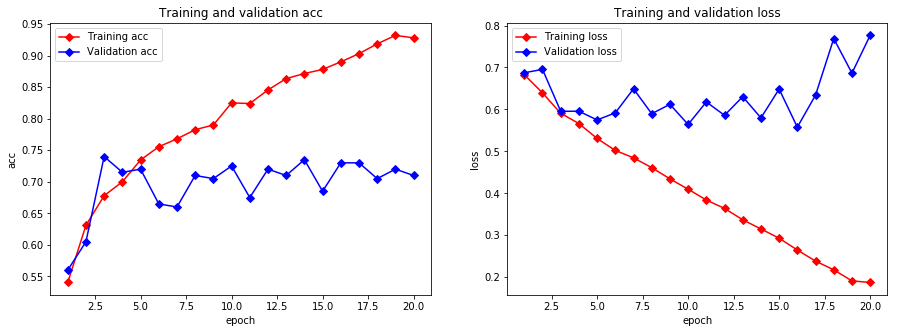

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig=plt.figure(figsize=(15,5))
for ev, val_ev, title, i in zip((acc, loss), (val_acc, val_loss), ("acc","loss"), (1,2)): 
    plt.subplot(1, 2, i)
    plt.plot(epochs, ev, 'r', marker="D", label='Training %s'% title)
    plt.plot(epochs, val_ev, 'b', marker="D", label='Validation %s'% title)
    plt.title('Training and validation %s'% title)
    plt.xlabel('epoch')
    plt.ylabel(title)
    plt.legend()

fig.show()

In [15]:
!ls

CNN.ipynb                RNN.ipynb                cats_and_dogs_small_1.h5
CatsVsDog.ipynb          _config.yml              training_history_plot


## Convolutional Networks with Dropout

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')

In [19]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/10
100/100 [==============================] - 326s - loss: 0.5870 - acc: 0.6844 - val_loss: 0.5474 - val_acc: 0.7126
Epoch 2/10
100/100 [==============================] - 267s - loss: 0.5798 - acc: 0.6941 - val_loss: 0.5672 - val_acc: 0.6946
Epoch 3/10
100/100 [==============================] - 256s - loss: 0.5683 - acc: 0.7022 - val_loss: 0.5619 - val_acc: 0.7036
Epoch 4/10
100/100 [==============================] - 279s - loss: 0.5653 - acc: 0.7000 - val_loss: 0.5294 - val_acc: 0.7202
Epoch 5/10
100/100 [==============================] - 256s - loss: 0.5621 - acc: 0.7034 - val_loss: 0.5338 - val_acc: 0.7272
Epoch 6/10
100/100 [==============================] - 260s - loss: 0.5589 - acc: 0.7156 - val_loss: 0.5297 - val_acc: 0.7303
Epoch 7/10
100/100 [==============================] - 246s - loss: 0.5483 - acc: 0.7175 - val_loss: 0.5096 - val_acc: 0.7443
Epoch 8/10
100/100 [==============================] - 250s - loss: 0.5434 - acc: 0.7203 - val_loss: 0.5285 - val_acc: 0.7332


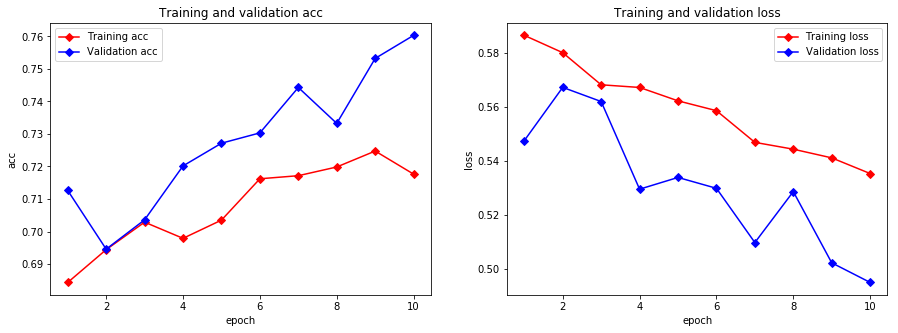

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig=plt.figure(figsize=(15,5))
for ev, val_ev, title, i in zip((acc, loss), (val_acc, val_loss), ("acc","loss"), (1,2)): 
    plt.subplot(1, 2, i)
    plt.plot(epochs, ev, 'r', marker="D", label='Training %s'% title)
    plt.plot(epochs, val_ev, 'b', marker="D", label='Validation %s'% title)
    plt.title('Training and validation %s'% title)
    plt.xlabel('epoch')
    plt.ylabel(title)
    plt.legend()

fig.show()

## Note
- withot dropout, validation accuracy stops improving at early stage, while it keeps improving with dropout
- when changed the final activation function (without dropout) from "sigmoid" to "softmax", both training and validation acciracies are quite low (0.50~0.55)